In [1]:
import numpy as np
import matplotlib.pyplot as plt
from helper import *
from scipy import fftpack as fp
from skimage import io, color, util

# 1. lamp.jpg

### 1a Tampilkan citra tersebut pada domain frekuensi!

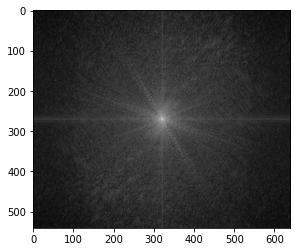

In [2]:
lamp = io.imread('lamp.jpg')
lamp_gray = color.rgb2gray(lamp)

# Calculate DFT
# ft contains imaginary and real numbers
ft = fp.fft2(lamp_gray)

# Calculate magnitude of imaginary and real numbers
ft_norm = abs(ft)

# Scale image
ft_scale = np.log(1 + ft_norm)

# Shift low frequency to the center of image
ft_shift = fp.fftshift(ft_scale)

plt.imshow(ft_shift, cmap=plt.cm.gray)
plt.show()

### 1b Tampilkan citra pada domain spasial dan domain frekuensi dari citra hasil penerapan Low Pass Filter dan jelaskan perbedaannya

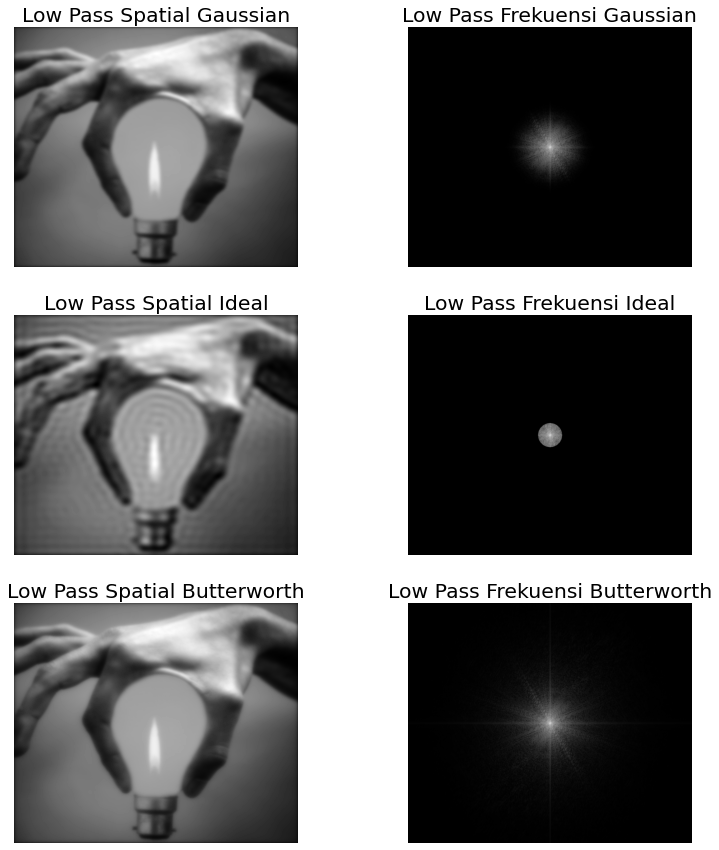

In [3]:
# Load image
i1 = color.rgb2gray(io.imread('lamp.jpg'))
w, l = paddedsize(i1.shape[0], i1.shape[1])

# Calculate DFT
f = fp.fft2(i1,(w,l))

# Create gaussian lowpass filter
# lpfilter function is provided in helper.py
def lpfs_image(ftype, f=f, w=w, l=l, D0=0.05, low_pass=True):
  return lpfilter(ftype, w, l, D0 * w ) * f if low_pass else hpfilter(ftype, w, l, D0 * w ) * f

# Calculate IDFT for spatial domain transformation
def lpf_image(lpfs_image, i1=i1):
  LPF_image = fp.ifft2(lpfs_image).real
  return LPF_image[:i1.shape[0],:i1.shape[1]]

# Shifting for fourier spectrum display
def fcf(lpfs_image):
  return fp.fftshift(lpfs_image)

def fc(f=f):
  return fp.fftshift(f)

# Scaling for fourier spectrum display
def scaling_low_pass_fourier_spectrum(Fcf):
  return np.log(1+abs(Fcf))

def get_low_pass_fourier_image(ftype, w=w, l=l, D0=0.05, f=f, low_pass=True):
  LPFS_image = lpfs_image(ftype, f, w, l, D0, low_pass=low_pass)
  return scaling_low_pass_fourier_spectrum(fcf(LPFS_image))

lp_spatial_gaussian = lpf_image(lpfs_image('gaussian'))
lp_frekuensi_gaussian = get_low_pass_fourier_image('gaussian')


lp_spatial_ideal = lpf_image(lpfs_image('ideal'))
lp_frekuensi_ideal = get_low_pass_fourier_image('ideal')


lp_spatial_butterworth = lpf_image(lpfs_image('btw'))
lp_frekuensi_butterworth = get_low_pass_fourier_image('btw')

plt.figure(figsize=(20,15))
plt.rcParams.update({'font.size': 17})
# Show image
plt.subplot(3,3,1); plt.imshow(lp_spatial_gaussian, cmap='gray')
plt.title("Low Pass Spatial Gaussian")
plt.axis("off")
plt.subplot(3,3,2); plt.imshow(lp_frekuensi_gaussian, cmap='gray')
plt.title("Low Pass Frekuensi Gaussian")
plt.axis("off")

plt.subplot(3,3,4); plt.imshow(lp_spatial_ideal, cmap='gray')
plt.title("Low Pass Spatial Ideal")
plt.axis("off")
plt.subplot(3,3,5); plt.imshow(lp_frekuensi_ideal, cmap='gray')
plt.title("Low Pass Frekuensi Ideal")
plt.axis("off")

plt.subplot(3,3,7); plt.imshow(lp_spatial_butterworth, cmap='gray')
plt.title("Low Pass Spatial Butterworth")
plt.axis("off")
plt.subplot(3,3,8); plt.imshow(lp_frekuensi_butterworth, cmap='gray')
plt.title("Low Pass Frekuensi Butterworth")
plt.axis("off")
plt.show()

#### Perbedaan hasil filtering
Jika dilihat hasil filtering dengan menggunakan filter gaussian, citra yang dihasilkan memiliki edges yang tegas dan cukup jelas. Sedangkan ketika menggunakan filter ideal edges dari objek terlihat sedikit samar serta terdapat beberapa efek seperti gelombang pada citranya. Terakhir, filter butterworth sekilas terlihat sama dengan hasil yang diberikan filter gaussian, namun, pada filter butterworth, edges dari objek terlihat lebih tegas dibandingkan dengan pada filter gaussian.

### 1c Tampilkan citra pada domain spasial dan domain frekuensi dari citra hasil penerapan High Pass Filter dan jelaskan perbedaannya

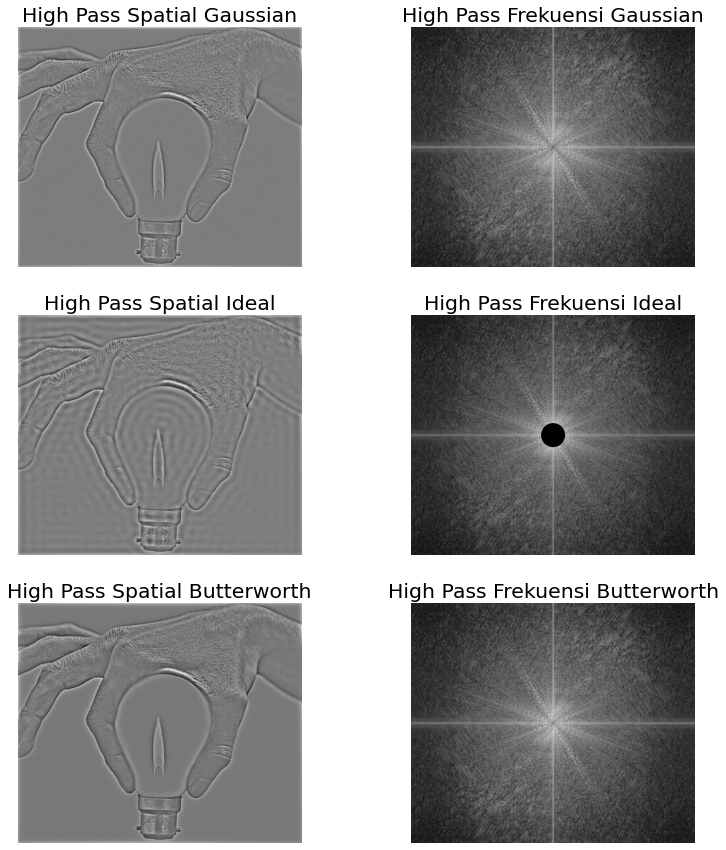

In [4]:
hp_spatial_gaussian = lpf_image(lpfs_image('gaussian', low_pass=False))
hp_frekuensi_gaussian = get_low_pass_fourier_image('gaussian', low_pass=False)


hp_spatial_ideal = lpf_image(lpfs_image('ideal', low_pass=False))
hp_frekuensi_ideal = get_low_pass_fourier_image('ideal', low_pass=False)


hp_spatial_butterworth = lpf_image(lpfs_image('btw', low_pass=False))
hp_frekuensi_butterworth = get_low_pass_fourier_image('btw', low_pass=False)

plt.figure(figsize=(20,15))
plt.rcParams.update({'font.size': 17})
# Show image
plt.subplot(3,3,1); plt.imshow(hp_spatial_gaussian, cmap='gray')
plt.title("High Pass Spatial Gaussian")
plt.axis("off")
plt.subplot(3,3,2); plt.imshow(hp_frekuensi_gaussian, cmap='gray')
plt.title("High Pass Frekuensi Gaussian")
plt.axis("off")

plt.subplot(3,3,4); plt.imshow(hp_spatial_ideal, cmap='gray')
plt.title("High Pass Spatial Ideal")
plt.axis("off")
plt.subplot(3,3,5); plt.imshow(hp_frekuensi_ideal, cmap='gray')
plt.title("High Pass Frekuensi Ideal")
plt.axis("off")

plt.subplot(3,3,7); plt.imshow(hp_spatial_butterworth, cmap='gray')
plt.title("High Pass Spatial Butterworth")
plt.axis("off")
plt.subplot(3,3,8); plt.imshow(hp_frekuensi_butterworth, cmap='gray')
plt.title("High Pass Frekuensi Butterworth")
plt.axis("off")
plt.show()

#### Perbedaan hasil filtering high pass
Jika dilihat hasil filtering dengan menggunakan filter high pass gaussian, citra yang dihasilkan memiliki edges yang tegas dan cukup jelas. Sedangkan ketika menggunakan filter ideal edges dari objek terlihat sedikit samar bahkan bentuk sebenarnya dari objek sudah   tidak terlihat dengan jelas Selain itu, terdapat beberapa efek seperti gelombang pada citranya. Terakhir, filter butterworth sekilas terlihat sama dengan hasil yang diberikan filter gaussian, namun, pada filter butterworth, edges dari objek terlihat lebih tegas dibandingkan dengan pada filter gaussian.

### 1d Bagaimana pengaruh dari nilai D0 yang anda gunakan pada bagian (b) dan (c)?

> Nilai cut off frequency berpengaruh pada tingkat kejelasan edges pada objek citra yang dihasilkan. Ketika nilai D0 yang digunakan semakin besar, terlihat bahwa edges dari objek pada citra di domain spatial semakin tidak jelas atau tidak tegas.

# 2. noisy_bird.jpg

### 2a Tampilkan citra tersebut pada domain frekuensi!

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  


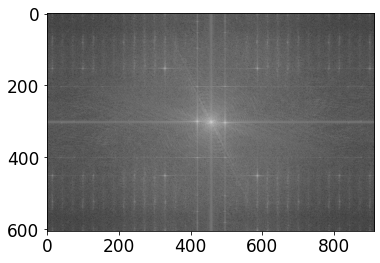

In [5]:
bird = io.imread('noisy_bird.jpg')
bird_gray = color.rgb2gray(bird)

# Calculate DFT
# ft contains imaginary and real numbers
ft = fp.fft2(bird_gray)

# Calculate magnitude of imaginary and real numbers
ft_norm = abs(ft)

# Scale image
ft_scale = np.log(1 + ft_norm)

# Shift low frequency to the center of image
ft_shift = fp.fftshift(ft_scale)

plt.imshow(ft_shift, cmap=plt.cm.gray)
plt.show()

### 2b Lakukan filtering yang tepat untuk mereduksi noise yang ada dan jelaskan mengapa anda memilih melakukan filtering tersebut!

Text(0.5, 1.0, 'Fourier Spectrum After Filter')

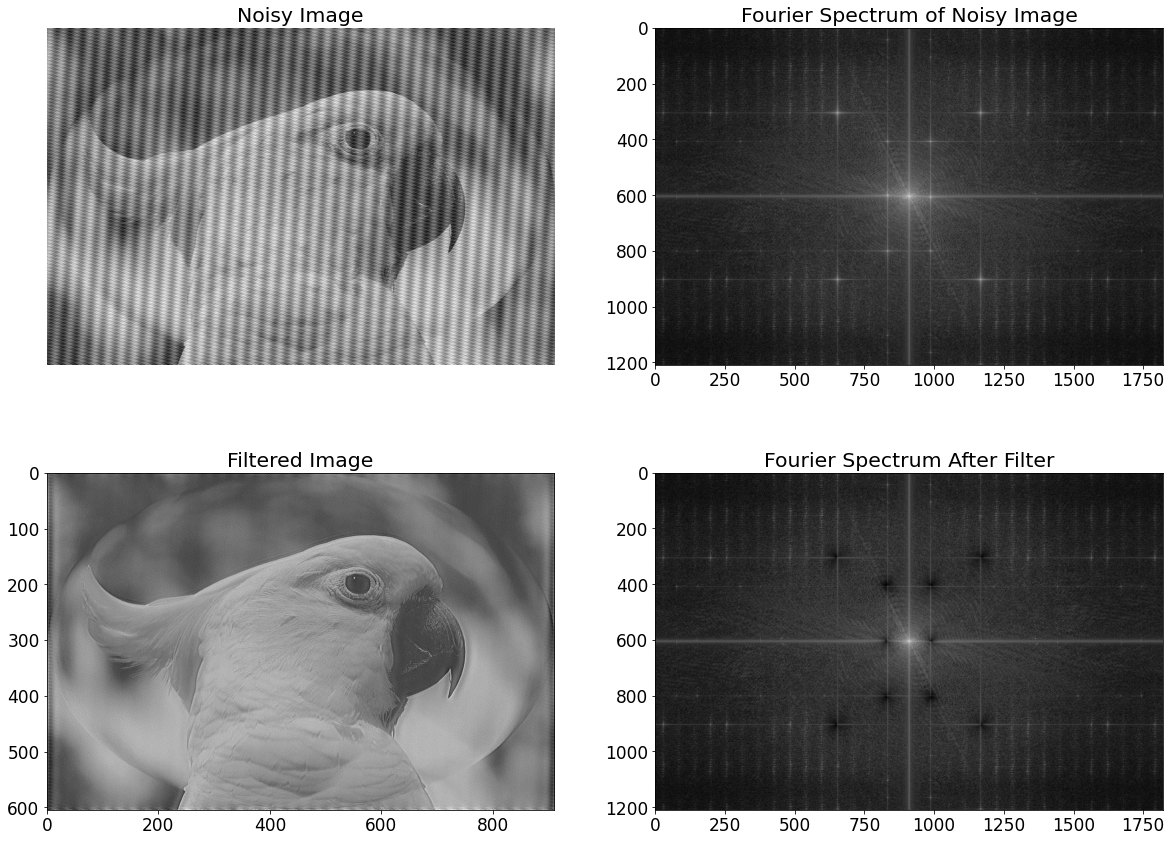

In [20]:
w, l = paddedsize(bird.shape[0],bird.shape[1])

# Calculate DFT
F = fp.fft2(util.img_as_float(bird),(w,l))

# Scaling & Shifting for fourier spectrum display
Fc = fp.fftshift(F)
S1 = np.log(1+abs(Fc))

# Apply notch filter
# notch function is provided in helper.py
H1 = notch('btw', w, l, 40, 80, 200)
H2 = notch('btw', w, l, 40, 80, 0)
H3 = notch('btw', w, l, 40, 80, -200)
H4 = notch('btw', w, l, 40, -80, -200)
H5 = notch('btw', w, l, 40, -80, 0)
H6 = notch('btw', w, l, 40, -80, 200)
H7 = notch('btw', w, l, 40, -260, 300)
H8 = notch('btw', w, l, 40, 260, 300)
H9 = notch('btw', w, l, 40, 260, -300)
H10 = notch('btw', w, l, 40, -260, -300)

# Apply notch filter
FS_bird = F*H1*H2*H3*H4*H5*H6*H7*H8*H9*H10

# Calculate IDFT for spatial domain transformation
F_bird = fp.ifft2(FS_bird).real
F_bird = F_bird[:bird.shape[0],:bird.shape[1]]

# Scaling & Shifting for fourier spectrum display
Fcf = fp.fftshift(FS_bird)
S2 = np.log(1+abs(Fcf))

plt.figure(figsize=(20,15))

plt.subplot(2,2,1); plt.imshow(bird, cmap='gray')
plt.title('Noisy Image'); plt.axis("off")

plt.subplot(2,2,2); plt.imshow(S1, cmap='gray')
plt.title('Fourier Spectrum of Noisy Image');
# plt.axis("off")

plt.subplot(2,2,3); plt.imshow(F_bird, cmap='gray')
plt.title('Filtered Image')
# plt.axis("off")

plt.subplot(2,2,4); plt.imshow(S2, cmap='gray')
plt.title('Fourier Spectrum After Filter')
# plt.axis("off")

> Filter high pass butterworth ini cukup baik digunakan pada kasus ini jika dibandingkan dengan dengan filter lainnya karena high pass butterworth dapat mempertahankan edges dari citra setelah dilakukan filtering terhadap pita frekuensi yang sempit untuk menghilangkan garis-garis yang menggangu pada citra.